In [2]:
import xgboost
import shap
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('south_german_credit_data_preprocessed.csv')
df.drop(0, inplace=True)
df = df.astype('int')
df

,checking account,duration in month,credit history,credit purpose,credit amount,savings account,employment since..,installment rate,status : sex,other debtors / guarantors,...,property,relationship : age,other installment plans,housing,existing credits,job,people to provide maintenance for,telephone,foreign worker,goodness
1,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
2,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
3,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
4,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
5,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
997,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
998,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
999,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [4]:
X = df.drop(columns=['goodness'])
y = df['goodness']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Logistic Regression

In [20]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.76


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [21]:
# explainer = shap.LinearExplainer(lr, X)
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_test)

In [22]:
index = 18
print(y_test.iat[index])

0


In [23]:
shap.initjs()
shap.plots.force(shap_values[index])

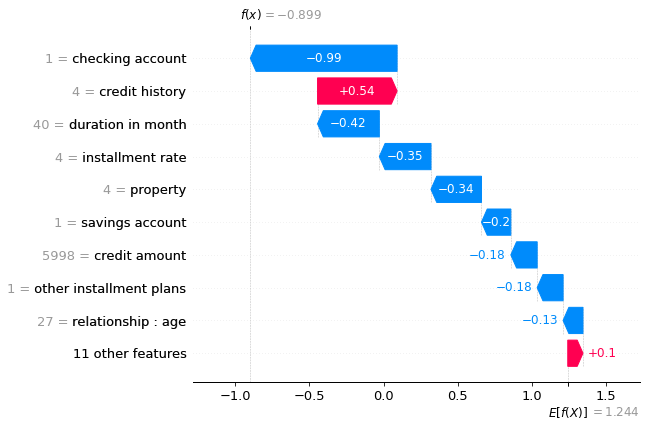

In [24]:
shap.plots.waterfall(shap_values[index])

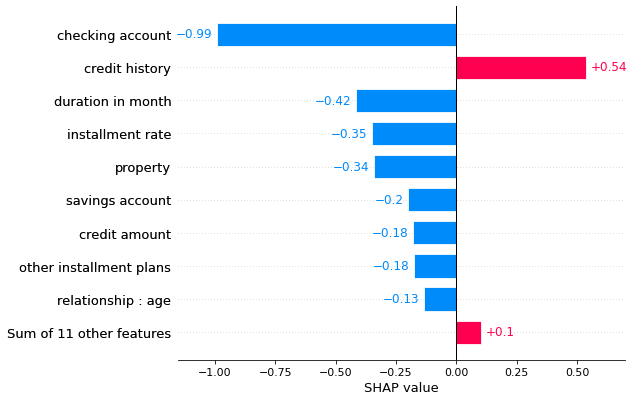

In [25]:
shap.plots.bar(shap_values[index])

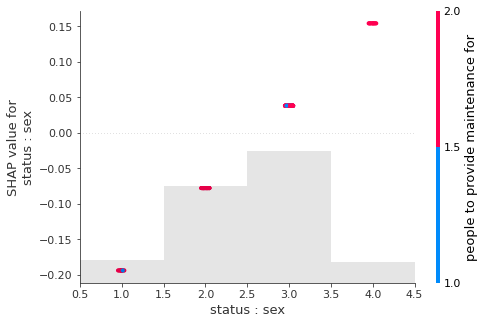

In [27]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,8], color=shap_values)

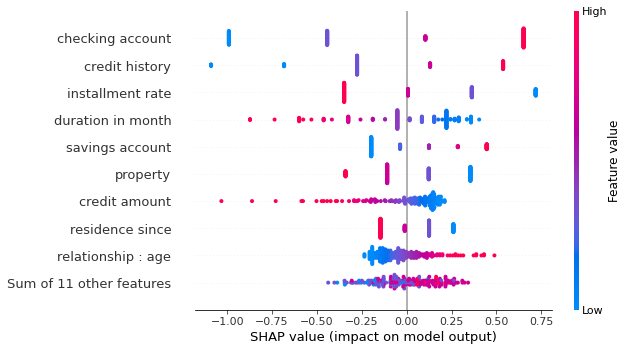

In [28]:
shap.plots.beeswarm(shap_values)

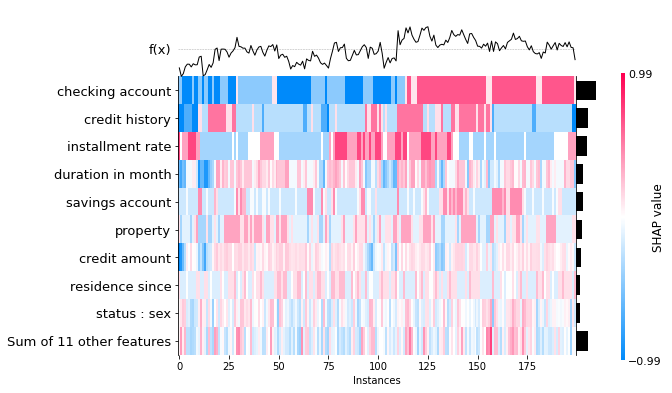

In [29]:
shap.plots.heatmap(shap_values)

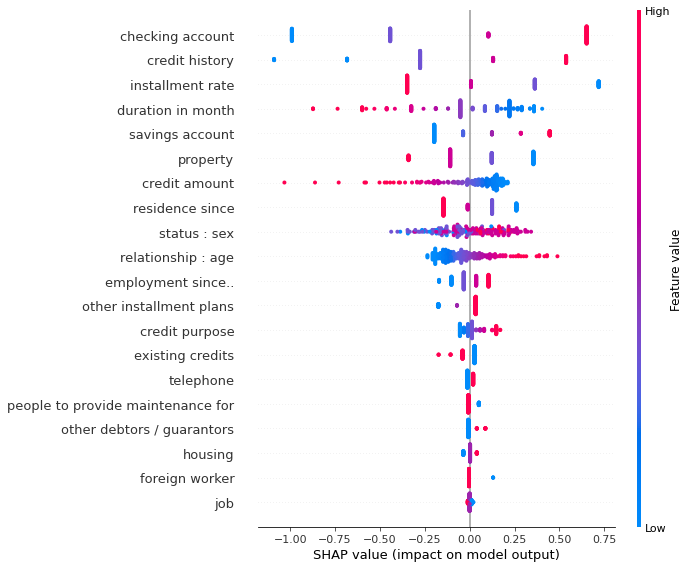

In [30]:
shap.summary_plot(shap_values)

## XGBoost

In [6]:
xgb = xgboost.XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:10:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.745


In [7]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
index = 18
print(y_test.iat[index])

0


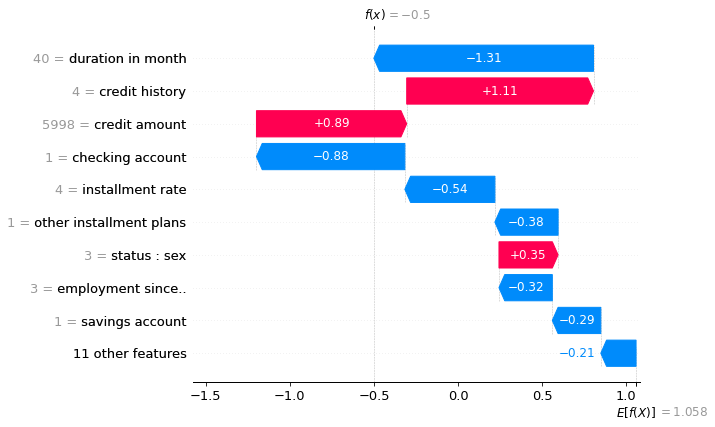

In [9]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[index])

In [10]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[index])

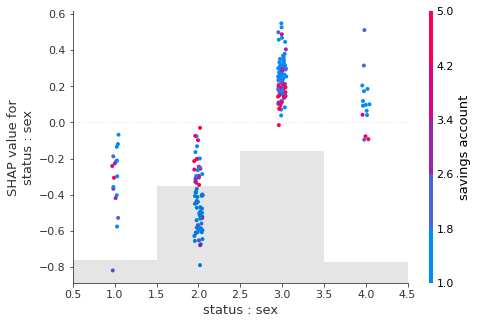

In [11]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,8], color=shap_values)

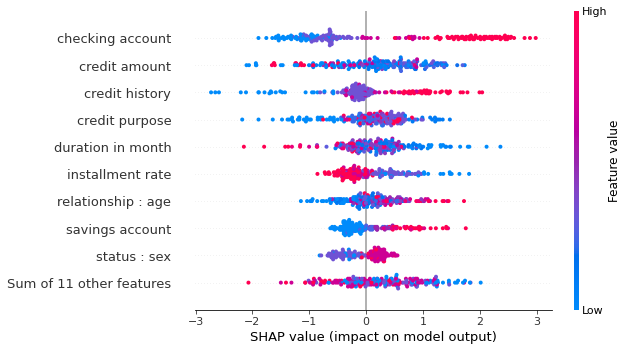

In [12]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

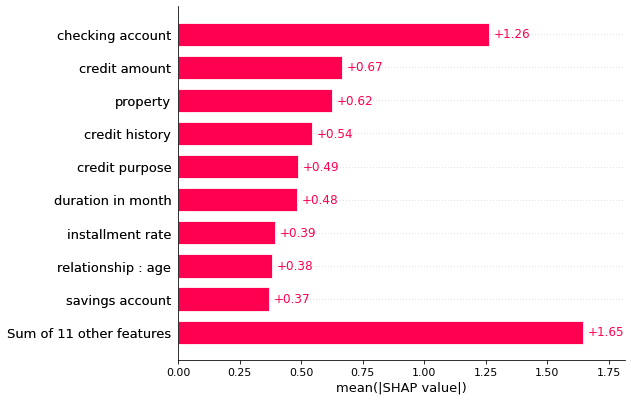

In [13]:
shap.plots.bar(shap_values)

## SVM

In [14]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [15]:
y_pred = svm.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.73


In [16]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]

In [17]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

In [18]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

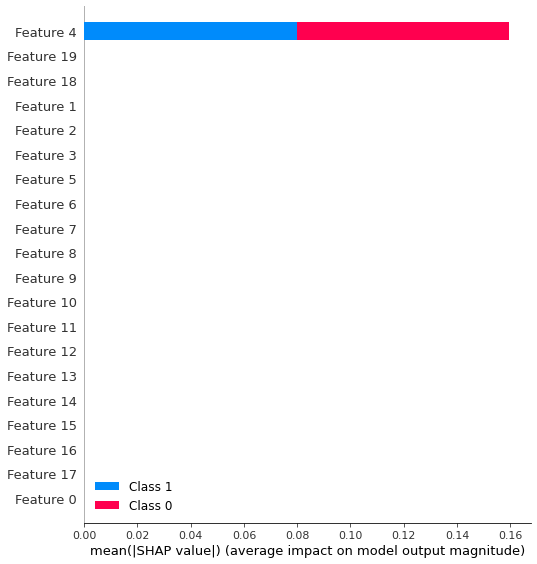

In [19]:
shap.summary_plot(shap_values)